# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')
require('readr')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
312,63991,117768,7115,2000,2000_Pres-D_NH,NH,Pres-P,Pres-D,KRC Research,160,Live Phone,NaN,1/26/00,400.0,Al Gore,222,DEM,48.0,Bill Bradley,224,DEM,40.0,NaN,8.0,2/1/00,49.73,45.59,4.14,NaN,1.0,NaN
167,54260,87796,1440,1998,1998_Gov-G_GA,GA,Gov-G,Gov-G,Marketing Workshop,194,Live Phone,NaN,10/26/98,709.0,Roy Barnes,13031,DEM,40.0,Guy Millner,13032,REP,45.0,NaN,-5.0,11/3/98,52.49,44.08,8.42,-13.42,0.0,NaN
3204,24818,88986,1342,2006,2006_Gov-G_MD,MD,Gov-G,Gov-G,SurveyUSA,325,IVR,NaN,11/4/06,663.0,Martin O'Malley,12704,DEM,50.0,Robert Ehrlich Jr.,12703,REP,47.0,1.0,3.0,11/7/06,52.69,46.16,6.53,-3.53,1.0,NaN
4886,64252,118230,1804,2009,2009_House-GS_NY-20,NY-20,House-G,House-GS,Siena College,305,Live Phone,NaN,3/26/09,917.0,Scott Murphy,14314,DEM,47.0,James Nicholas Tedisco,14315,REP,43.0,NaN,4.0,3/31/09,50.23,49.77,0.45,3.55,1.0,NaN
10332,72605,136253,6221,2020,2020_Pres-G_GA,GA,Pres-G,Pres-G,Morning Consult,218,Online,NaN,10/27/20,1743.0,Joseph R. Biden Jr.,13256,DEM,48.8,Donald Trump,13254,REP,46.4,NaN,2.4,11/3/20,49.47,49.24,0.24,2.16,1.0,NaN


The cell below loads the same data in R:

In [5]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [9]:
%%R

# make df with Siena College and NYT Upshot

siena_df <- df %>% filter(pollster=='Siena College/The New York Times Upshot')

siena_df

# A tibble: 83 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   47325     74070      52  2016 2016… NC      Gov-G   Gov-G   Siena …     448
 2   47325     74050      62  2016 2016… NC      Sen-G   Sen-G   Siena …     448
 3   47325     74047     629  2016 2016… NC      Pres-G  Pres-G  Siena …     448
 4   47551     74389      86  2016 2016… PA      Sen-G   Sen-G   Siena …     448
 5   47551     74387     640  2016 2016… PA      Pres-G  Pres-G  Siena …     448
 6   47771     74777      93  2016 2016… FL      Sen-G   Sen-G   Siena …     448
 7   47771     74762     611  2016 2016… FL      Pres-G  Pres-G  Siena …     448
 8   48524     76188      52  2016 2016… NC      Gov-G   Gov-G   Siena …     448
 9   48524     76067      62  2016 2016… NC      Sen-G   Sen-G   Siena …     448
10   48524     76066     629  2016 2016… NC      Pres-G  Pres-G  Siena …     448
# … with

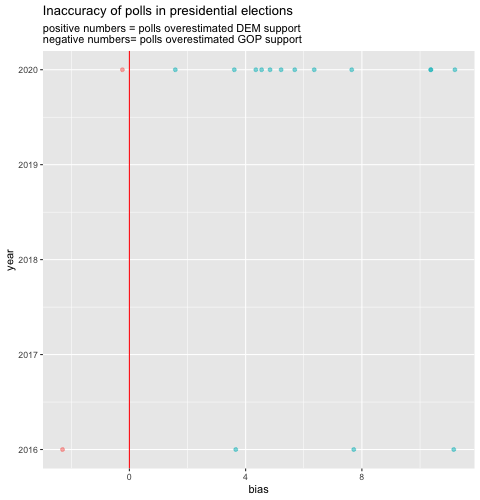

In [23]:
%%R -h 500

siena_df_pres_general <- siena_df %>% 
    filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(siena_df_pres_general) +
    aes(x=bias, y=year, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")


 The Upshot's Presidential polls leaned further Democrat in 2020 and 2016

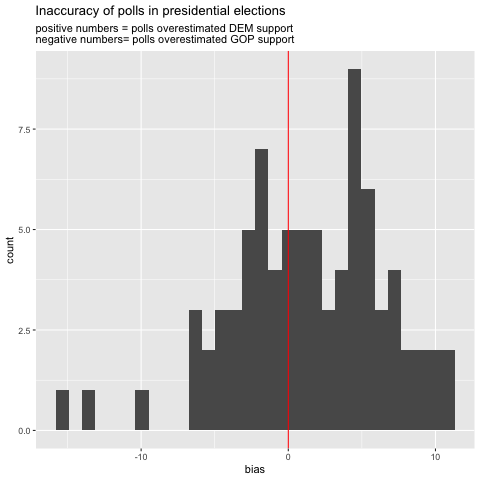

In [16]:
%%R
# a basic histogram
ggplot(siena_df) +
    aes(x=bias) +
    geom_histogram(bins=30) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

In [14]:
%%R 

siena_df$bias  %>% summary()

# slight democrat bias

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-15.010  -2.075   1.515   1.423   5.125  11.200       1 


👉 **Jayhawk Consulting**

In [26]:
%%R

# make df with Jawhawk 

jayhawk_df <- df %>% filter(pollster=='Jayhawk Consulting Services')

jayhawk_df

# A tibble: 2 × 31
  poll_id question…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
    <dbl>      <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
1   36081      49015    5495  2014 2014… KS-1    House-G House-G Jayhaw…     157
2   56550      90986     330  2018 2018… KS-1    House-G House-G Jayhaw…     157
# … with 21 more variables: methodology <chr>, partisan <chr>, polldate <chr>,
#   samplesize <dbl>, cand1_name <chr>, cand1_id <dbl>, cand1_party <chr>,
#   cand1_pct <dbl>, cand2_name <chr>, cand2_id <dbl>, cand2_party <chr>,
#   cand2_pct <dbl>, cand3_pct <dbl>, margin_poll <dbl>, electiondate <chr>,
#   cand1_actual <dbl>, cand2_actual <dbl>, margin_actual <dbl>, bias <dbl>,
#   rightcall <dbl>, comment <chr>, and abbreviated variable names
#   ¹​question_id, ²​location, ³​type_simple, ⁴​type_detail, ⁵​pollster, …
# ℹ Use `colnames()` to see all variable names


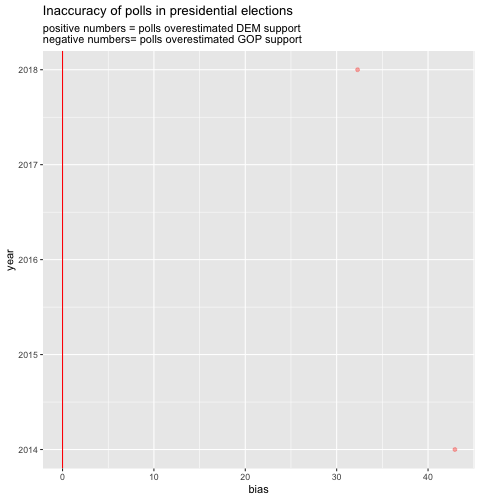

In [29]:
%%R -h 500

jayhawk_df_pres <- jayhawk_df %>% 
    filter(type_simple=='House-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(jayhawk_df_pres) +
    aes(x=bias, y=year, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

Jayhawk Consulting only conducted 2 of the polls in the entire dataset. Both were for General House elections, in 2014 and 2018. Both were wrong and skewed Republican.

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [30]:
%%R

# make df with Fox news et al

fox_df <- df %>% filter(pollster=='Fox News/Beacon Research/Shaw & Co. Research')


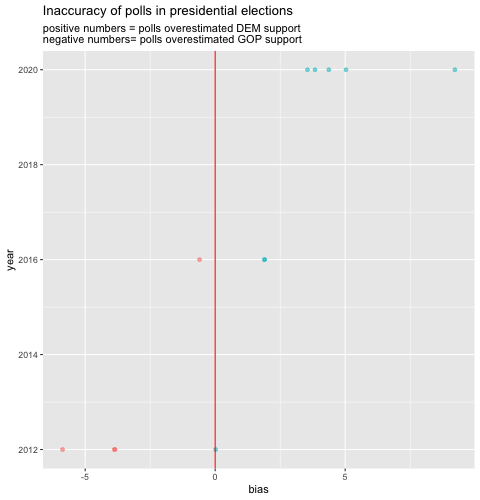

In [32]:
%%R -h 500

fox_df_pres <- fox_df %>% 
    filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(fox_df_pres) +
    aes(x=bias, y=year, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

In 2020 the Fox news poll skewed Democrat. It was relatively balanced in 2016.

👉 **Brown University**

In [33]:
%%R

# make df with Jawhawk 

brown_df <- df %>% filter(pollster=='Brown University')

brown_df

# A tibble: 12 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1    7278      8927    7150  2000 2000… RI      Pres-P  Pres-D  Brown …      35
 2   64034    117851    7152  2000 2000… VT      Pres-P  Pres-D  Brown …      35
 3    6416      7883     845  2000 2000… RI      Pres-G  Pres-G  Brown …      35
 4    6416     27199    1707  2000 2000… RI      Sen-G   Sen-G   Brown …      35
 5   25424     88455    1409  2002 2002… RI      Gov-G   Gov-G   Brown …      35
 6   25424     30664    1675  2002 2002… RI      Sen-G   Sen-G   Brown …      35
 7   25424    117562    3067  2002 2002… RI-1    House-G House-G Brown …      35
 8    2383      2964    7404  2008 2008… RI      Pres-P  Pres-D  Brown …      35
 9   34002     41321    1239  2014 2014… RI      Gov-G   Gov-G   Brown …      35
10   34316     42010    1239  2014 2014… RI      Gov-G   Gov-G   Brown …      35
11   427

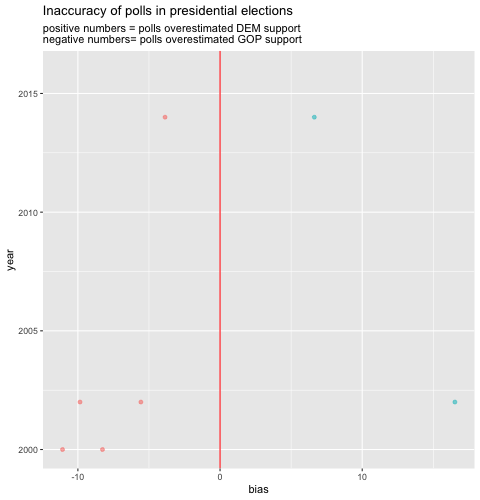

In [37]:
%%R -h 500

# brown_df_pres <- brown_df %>% 
#     filter(type_simple=='Sen-G') # Filter data to polls in presidential general elections only
# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(brown_df) +
    aes(x=bias, y=year, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

We're not sure how to compare these because they are different types on elections.

👉 **American Research Group**

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
